<a href="https://colab.research.google.com/github/Harbiodun0122/OCR-for-Nigerian-Licence-Plate-/blob/master/YOLO_detect_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Import libraries
import numpy as np
import os, cv2, torch, random
import matplotlib.pyplot as plt

In [3]:
# Set SEED value for reproducibility
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
cv2.setRNGSeed(SEED)

# PyTorch
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# Deterministic behavior
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)


# Environment
os.environ["PYTHONHASHSEED"] = str(SEED)

In [4]:
# Install ultralytics
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
# Set paths
BASE_DIR = "/content/drive/MyDrive/Licence Plate OCR"
output_path = os.path.join(BASE_DIR, "licence_detection_output")
yaml_file = os.path.join(BASE_DIR, "dataset", "data.yaml")

In [13]:
# Model training
model = YOLO("yolo11s.pt")
results = model.train(data=yaml_file, epochs=80, imgsz=640, batch=16, project=output_path, device=0,
                      patience=10, seed=SEED, lr0=0.001, lrf=0.01, optimizer='AdamW', deterministic=True)

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Licence Plate OCR/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspec

In [14]:
# Load the model
custom_model = "/content/drive/MyDrive/Licence Plate OCR/licence_detection_output/train/weights/best.pt"
model = YOLO(custom_model)

# Validate the model
metrics = model.val(project=output_path)
print("map50-95: ", metrics.box.map)
print("map50: ", metrics.box.map50)
print("map75: ", metrics.box.map75)
print(metrics.confusion_matrix.to_df())

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 37.6±6.0 MB/s, size: 62.9 KB)
val: Scanning /content/drive/MyDrive/Licence Plate OCR/dataset/valid/labels.cache... 433 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 433/433 534.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 28/28 3.4it/s 8.3s
                   all        433        433          1          1      0.995      0.874
Speed: 2.1ms preprocess, 9.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/drive/MyDrive/Licence Plate OCR/licence_detection_output/val
map50-95:  0.8738716771127628
map50:  0.995
map75:  0.9900625606061152
shape: (2, 3)
┌───────────────┬───────────────┬────────────┐
│ Predicted     ┆ license_plate ┆ background │
│ ---           ┆ ---   

**Inferencing on test image**

In [15]:
image_folder = "/content/drive/MyDrive/Licence Plate OCR/dataset/test/images"

In [16]:
# Predict on folder with options
results = model.predict(
    image_folder,
    conf=0.8,
    iou=0.5,
    save=True,
    show=True,
    imgsz=640,
    project=output_path,
    name="predict"
)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/858 /content/drive/MyDrive/Licence Plate OCR/dataset/test/images/1000_jpg.rf.57798c6dd78d443abe31e992efdc5e3c.jpg: 640x640 1 license_plate, 34.2ms
image 2/858 /content/drive/MyDrive/Licence Plate OCR/dataset/test/images/104_jpg.rf.043a9ba7c20a8ce78b5b81e446822e37.jpg: 640x640 1 license_plate, 15.7ms
image 3/858 /content/drive/MyDrive/Licence Plate OCR/dataset/test/images/114_jpg.rf.fd559c4c129a79c0975417c62e58e144.jpg: 640x640 1 license_plate, 15.6ms
image 4/858 /content/drive/MyDrive/Licence Plate OCR/dataset/test/images/117_jpg.rf.d90f893290dbbfdf3b6a41620c44be0c.jpg: 640x640 1 license_plate, 15.7ms
image 5/858 /content/drive/MyDrive/Licence Plate OCR/dataset/test/images/123_jpg.rf.f1622ac6e4665fbbe8606c8bedf798ce.jpg: 640x640 1 license_plate, 15.7ms
image 6/858 /content/drive/MyDrive/Licence Plate OCR/dataset/test/images/133_jpg.rf.4f55d2cde0493fe05e393653ae1e73b5.jpg: 640x640 1 license_plate, 15.6ms


In [17]:
# Access results
for result in results:
  boxes = result.boxes  # Bounding boxes
  print(f"Found {len(boxes)} objects")

  # Get coordinates and confidence
  for box in boxes:
    x1, y1, x2, y2 = box.xyxy[0]  # Box coordinates
    conf = box.conf[0]             # Confidence
    cls = box.cls[0]               # Class
    print(f"Class: {cls}, Confidence: {conf:.2f}")

Found 1 objects
Class: 0.0, Confidence: 0.87
Found 1 objects
Class: 0.0, Confidence: 0.86
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.87
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.87
Found 1 objects
Class: 0.0, Confidence: 0.87
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.87
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 0 objects
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.87
Found 1 objects
Class: 0.0, Confidence: 0.88
Found 1 objects
Class: 0.0, Confidence: 0.87
Found 1 objects
Class: 0.0, Confidence: 0.86
Found 1 objects
Class: 0.0, Confidence: 0.87
Found 1 objects
Class: 0.0, Confidence:

**Visualisation**

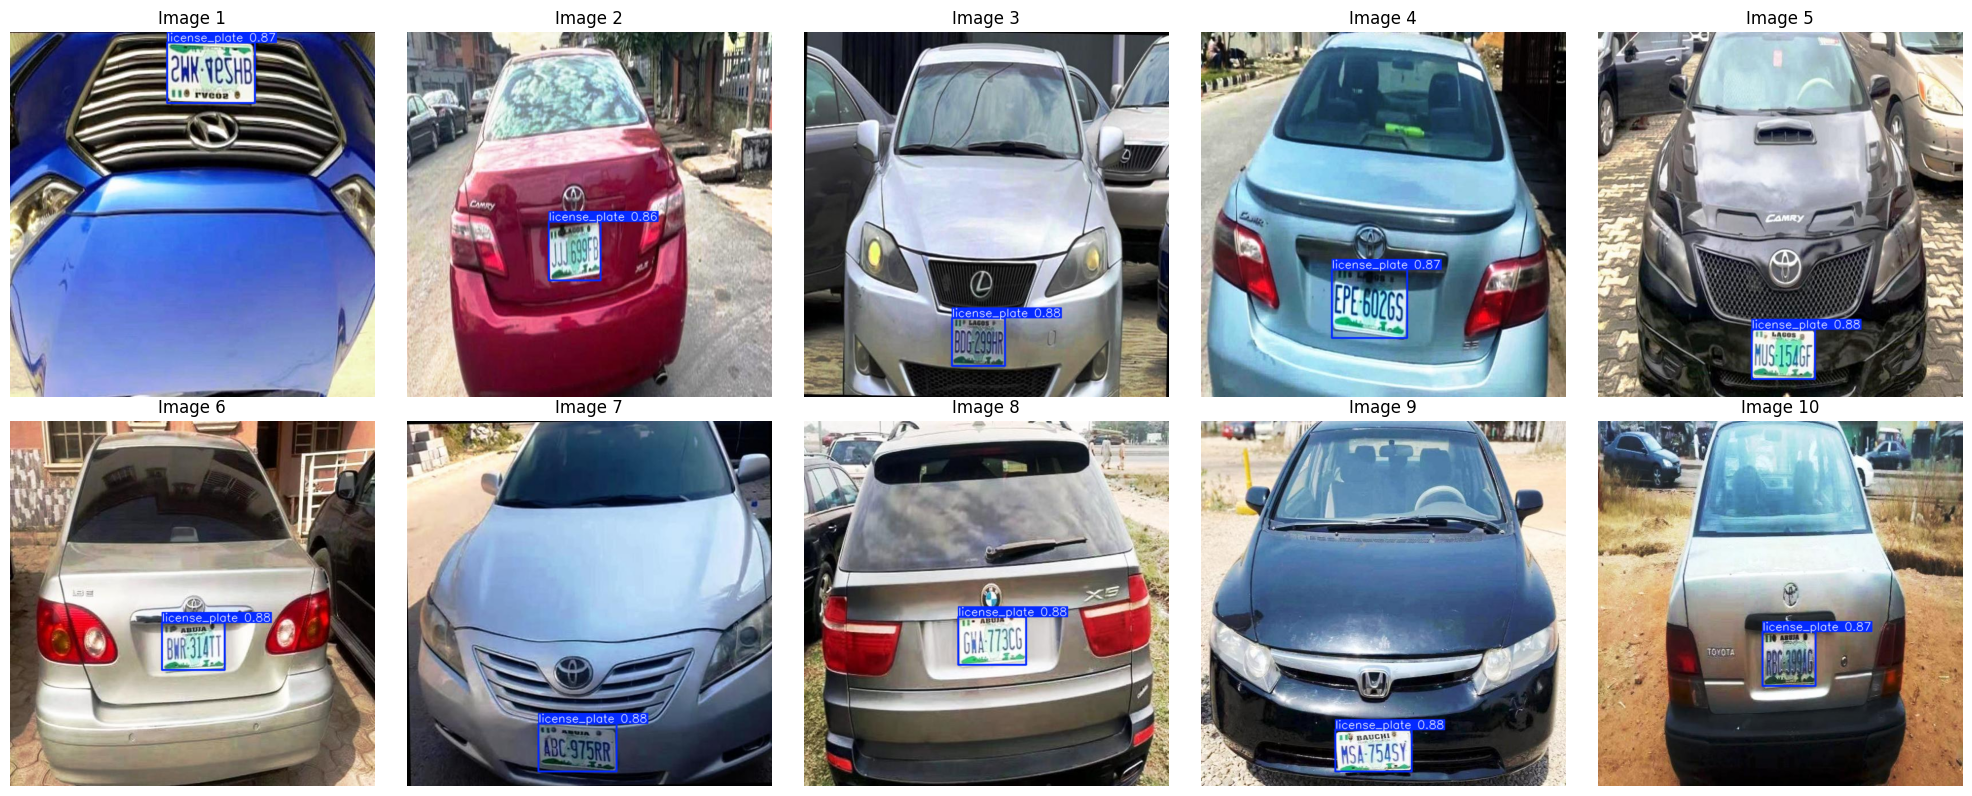

In [20]:
# Display first 10 images with bounding boxes
num_images = min(10, len(results))
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i in range(num_images):
  # Get image with boxes drawn
  img = results[i].plot()  # Returns image with bounding boxes

  # Convert BGR to RGB (OpenCV uses BGR)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Display
  axes[i].imshow(img_rgb)
  axes[i].axis('off')
  axes[i].set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()